# **Exploratory Data Analysis (EDA) Report of Import Export Dataest**

Author: Asad Raza Virk

Email: asad.raza.virk@gmail.com

## 1. **Introduction**

- **Dataset Name**: Imports_Exports V23

- **Source**: https://www.kaggle.com/datasets/willianoliveiragibin/imports-exports-v23/data

- **Date of Analysis**: 2024/10/24

- **Objective** : 
    The objective of this exploratory data analysis (EDA) is to gain insights into the import-export dataset by examining patterns, trends, and key factors that influence international trade. Specifically, this report aims to:

    - **Understand the structure of the dataset**: 
            Analyze the overall composition of the dataset, including the number of records, types of variables, and data completeness.

    - **Identify key trade indicators**: 
        Investigate key metrics such as trade volumes, value of imports and exports, major trade routes, and trading partners over time.

    - **Analyze product categories**: 
        Examine the distribution of different product categories in terms of their import and export values to identify the most significant commodities.

    - **Explore geographical trends**: 
        Analyze the countries or regions involved in the import-export activities to identify the top importing and exporting countries and any regional patterns.

    - **Detect seasonality or time-based trends**: 
        Identify any trends or seasonal variations in trade activities over time (e.g., monthly, quarterly, or yearly trends).

    - **Evaluate data quality**: 
        Detect and handle any missing values, outliers, or inconsistencies in the dataset to ensure reliable results.

    - **Uncover potential correlations**: 
        Investigate relationships between different variables (e.g., country, product type, trade value) to uncover significant patterns that may impact trade dynamics. 


## 2. **Importing the Python Libraries**

        Follwoing python libraries are used for the analysis:
        
    - `pandas` : For data manipulation and analysis.
    - `numpy` : For numerical operations.
    - `matplotlib.pyplot` : For data visualization.
    - `seaborn` : For data visualization.
    

In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Environment Setup

In [16]:
# set the environment to print all the columns
pd.set_option('display.max_columns', None)


### Importing the data
 The dataset is imported from the csv file named as data.csv which is stored in the data folder of the directory as this notebook.
 

In [3]:
# Import the dataset from the data folder of the is project folder , file name is 'data.csv'
dataset = pd.read_csv('data/data.csv')

## 4. **Composition of Dataset**

### 4.1. **Data Structure and Data Types**
The Structure is examined and the Data types of the columns are checked.

### 4.1.1 **Dataset Dimensions**


In [4]:
# Print the dimensions of the dataset using the shape attribute
print("The dataset has {} rows and {} columns".format(dataset.shape[0],dataset.shape[1]))


The dataset has 15000 rows and 12 columns


### 4.1.2. **Inspection of Data Set**


In [5]:
## Inspect the dataset
# the first 5 rows of the dataset using the head method
print(dataset.head())


                         Transaction_ID           Country    Product  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd          Colombia   describe   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455             Chile  president   
2  f7c1bd87-4da5-4709-9471-3d60c8a70639  Christmas Island     agency   
3  e443df78-9558-467f-9ba9-1faf7a024204           Finland     policy   
4  23a7711a-8133-4876-b7eb-dcd9e87a1613       New Zealand   positive   

  Import_Export Shipping_Method          Port     Category  Quantity    Value  \
0        Export             Air    Robertbury    Machinery      1979  9506.57   
1        Export             Air      Shahport     Clothing      5763  7100.91   
2        Export             Air      Adamfort    Furniture      2592  7226.42   
3        Export             Air     Juliebury  Electronics      2622  2817.29   
4        Export             Sea  East Randall    Machinery      6975   657.80   

         Date  Customs_Code   Weight  
0  07-12-2023        620537  4248.65  
1 

### 4.1.3 **Data Types**
    In this section, we will examine the data types of each column in the dataset to ensure that they are correctly interpreted by pandas.

In [6]:
# print the datatypes of the columns using the dtypes attribute in tabular form
print("Data types of the columns")
print(dataset.dtypes)

Data types of the columns
Transaction_ID      object
Country             object
Product             object
Import_Export       object
Shipping_Method     object
Port                object
Category            object
Quantity             int64
Value              float64
Date                object
Customs_Code         int64
Weight             float64
dtype: object


### 4.2.4. **The Metadata and Column Information**

The data types are the kinds of values stored in each column of the import-export dataset. Here's an interpretation of each data type:

- **Transaction_ID (object)**: The column contains alphanumeric values, A unique identifier for each trade transaction, ensuring every entry can be tracked and referenced individually.

- **Country (object)**: The country of origin (for imports) or destination (for exports), represented as strings

- **Product (object)**: The specific product involved in the trade, which are also strings.

- **Import_Export (object)**: A clear indicator of whether the transaction is an import or export, stored as a string.

- **Shipping_Method (object)**: The mode of transportation (e.g., Air, Sea, Land) used to move the goods, stored as strings.

- **Port (object)**: The entry or departure port where the transaction was processed, stored as strings.

- **Category (object)**: The product category (e.g., Electronics, Clothing, Machinery), stored as strings.

- **Quantity (int64)**: The amount of the product traded, stored as integers (64-bit precision).

- **Value (float64)**: The monetary value of the trade, in U.S. dollars, stored as floating-point numbers (decimal values).

- **Date (object)**: The date when the transaction occurred. Dates are represented as strings in this column, and may need conversion to a proper datetime format for further analysis.

- **Customs_Code (int64)**: The Harmonized System (HS) or customs code for the product, stored as 64-bit integers.

- **Weight (float64)**: The product’s weight in kilograms, stored as floating-point numbers (decimal values).

### 4.2.5. **Handling of Incorrect Data Types**
    The Dates column is converted to datetime format for further analysis.

In [7]:
# convert the datatype of the 'Date' column to datetime using the to_datetime method
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)


### 4.2.6. **High Cardinality Columns**
    The high cardinality columns are identified and examined to determine if they need further processing.
    

In [8]:
# identify the high cardinality columns in the dataset using the nunique method
print("High cardinality columns")
print(dataset.nunique())

High cardinality columns
Transaction_ID     15000
Country              243
Product              971
Import_Export          2
Shipping_Method        3
Port               10657
Category               5
Quantity            7755
Value              14884
Date                1827
Customs_Code       14881
Weight             14775
dtype: int64


The following columns with their corresponding unique value counts:

- **Transaction_ID ( 15,000 unique values)**: This column has high cardinality, as it contains a unique ID for almost every transaction, which is typical in datasets where each row represents an individual transaction. This column might not be useful for modeling because it doesn’t provide any meaningful pattern, just a unique identifier.

- **Country (243 unique values)**: With 243 unique values, the cardinality of this column is moderately high. This could be significant when analyzing data based on country-level trade patterns, but for certain machine learning models, this could require special handling (e.g., one-hot encoding or feature embedding).

- **Product (971 unique values)**: The Product column has relatively high cardinality, with 971 distinct products. This indicates a large variety of items being traded, which could impact modeling, especially if you want to analyze trends by product category.

- **Import_Export (2 unique values)**: This column has very low cardinality, as it only contains two distinct values, likely representing whether a transaction is an "Import" or "Export." It’s simple and can be easily encoded.

- **Shipping_Method (3 unique values)**: Similarly, this column has low cardinality, likely indicating three different shipping methods. This won't cause any significant issue during modeling.

- **Port (10,657 unique values)**: The Port column has extremely high cardinality, with 10,657 unique entries. This represents a large number of different ports used in the transactions, which might complicate analysis. Handling high cardinality features like this might involve grouping ports by region or other characteristics to reduce complexity.

- **Category (5 unique values)**: The Category column has very low cardinality, which means only a few distinct categories are represented. This column is straightforward to encode.

- **Quantity (7,755 unique values)**: The Quantity column shows moderately high cardinality, with 7,755 unique values. This variation in quantities traded suggests a diverse range of product sizes/quantities being shipped, and this feature is likely numeric, so handling this in a model would be relatively easy.

- **Value (14,884 unique values)**: The Value column has very high cardinality, indicating a wide range of monetary transaction values. Since this is a continuous numeric feature, it may not require special handling beyond normalization or scaling.

- **Date (1,827 unique values)**: The Date column has moderately high cardinality, reflecting the number of distinct dates on which transactions occurred. Dates may need to be converted into a more useful format (e.g., extracting features like year, month, or day of the week).

- **Customs_Code (14,881 unique values)**: The Customs_Code column also has very high cardinality, with each transaction likely having a different customs classification. It may need special handling like grouping codes into broader categories.

- **Weight (14,775 unique values)**: This column, which likely represents the weight of the traded goods, has high cardinality. Like the Value column, it is a numeric feature, so standard scaling or transformation techniques would be sufficient.

### 4.2.7. **Unit Consistency Check**
    The consistency of units in the dataset is checked to ensure that all values are in the same unit of measurement. The `Product` , `port` and `Date` columns had some inconsistencies , which will be handled at the appropriate time. While numerical columns like `Quantity`, `Value`, and `Weight` are expected to be in the same unit of measurement (e.g., kilograms, U.S. dollars), it is important to verify this assumption to avoid errors in analysis.

## 4.3. **Missing Values**
    The missing values in the dataset are checked.

In [9]:
# Check the missing values in the dataset using the isnull method and also print the percentage of missing values 
# by rounding the number to 2 decimal places
missing_values = dataset.isnull().sum()
missing_values_percentage = round((missing_values/len(dataset))*100,2)
print("Missing values in the dataset")
print(pd.concat([missing_values,missing_values_percentage],axis=1,keys=['Missing values','Percentage']))

Missing values in the dataset
                 Missing values  Percentage
Transaction_ID                0         0.0
Country                       0         0.0
Product                       0         0.0
Import_Export                 0         0.0
Shipping_Method               0         0.0
Port                          0         0.0
Category                      0         0.0
Quantity                      0         0.0
Value                         0         0.0
Date                          0         0.0
Customs_Code                  0         0.0
Weight                        0         0.0


As per the above table, there are no missing values in the dataset.

## 4.4. **Duplicates**
    The duplicate rows in the dataset are checked.

In [10]:
# check ducplicates in the dataset using the duplicated method
duplicates = dataset.duplicated().sum()
print("Number of duplicates in the dataset: ",duplicates)

Number of duplicates in the dataset:  0


---     

## 5 **Distribution of Data**
 In this section , the distribution of the data is examined. The distribution of the data is important to understand the spread of the data and to identify any outliers or anomalies.

### 5.1. **Summary Statistics**
    The descriptive statistics of the numerical columns are examined to understand the distribution of the data.

### 5.1.1 **Measures of Central Tendency**
    The measures of central tendency (mean, median, and mode) are calculated for the numerical columns to understand the central values around which the data is distributed.

In [32]:
# print the summary statistics of the dataset using the describe method in tabular form
print("Summary statistics of the dataset")
print(dataset.describe())



Summary statistics of the dataset
           Quantity         Value                        Date  Customs_Code  \
count  15000.000000  15000.000000                       15000   15000.00000   
mean    4980.554733   5032.931120  2022-03-02 20:42:48.960000  549507.95920   
min        1.000000    102.120000         2019-09-07 00:00:00  100041.00000   
25%     2517.000000   2552.750000         2020-12-06 00:00:00  325635.50000   
50%     4958.500000   5045.705000         2022-03-02 00:00:00  545432.00000   
75%     7458.250000   7504.700000         2023-05-27 00:00:00  777988.00000   
max    10000.000000   9999.130000         2024-09-06 00:00:00  999964.00000   
std     2866.166690   2857.593897                         NaN  260886.91886   

             Weight  
count  15000.000000  
mean    2492.118859  
min        0.570000  
25%     1243.482500  
50%     2476.135000  
75%     3747.392500  
max     4999.930000  
std     1451.378507  


**Interpretation of Summary Statistics**:
The summary statistics give a detailed overview of the key numeric columns in the dataset, including Quantity, Value, Customs_Code, and Weight, along with some other columns like Date (treated as an object here). Below is the interpretation for each column based on the summary statistics provided:


**Quantity**:

- **Count**: 15,000 entries (all rows have data for this field).
- **Mean**: The average quantity is around 4,980 units.
- **Min**: The minimum quantity is 1, indicating that some transactions involved just a single unit.
- **25% Quartile**: The bottom 25% of the transactions involve quantities up to 2,517 units.
- **50% (Median)**: Half of the transactions involve quantities of up to 4,958 units.
- **75% Quartile**: The top 25% of the transactions have quantities up to 7,458 units.
- **Max**: The largest quantity in a transaction is 10,000 units.
- **Std Dev (Standard Deviation)**: A standard deviation of 2,866 indicates moderate variability in the quantities of items traded.

**Value**:

- **Count**: 15,000 entries (all rows have data for this field).
- **Mean**: The average transaction value is approximately $5,023.
- **Min**: he smallest transaction value is $102.12, indicating a very small trade.
- **25% Quartile**: The bottom 25% of transactions are valued up to $2,552.
- **50% (Median)**: The middle transaction value is $5,045.
- **75% Quartile**: The top 25% of transactions are valued up to %7,504.
- **Max**: The highest transaction value is $9,999.
- **Std Dev (Standard Deviation)**: The standard deviation of $2,857 shows significant variability in transaction values, suggesting a wide range of transaction sizes.

**Customs_Code**:

- **Count**: 15,000 customs codes, meaning no missing data.
- **Mean**: The average customs code is approximately 549,507.95, but since this is likely a categorical or encoded numeric feature, its interpretation as a "mean" might not be meaningful.
- **Min**: The smallest customs code is 100,041.
- **25% Quartile**: The bottom 25% of customs codes are up to 325,635.
- **50% (Median)**: Half of the transactions have customs codes up to 545,432.
- **75% Quartile**: The top 25% of customs codes go up to 777,988.
- **Max**: The highest customs code is 999,964.
- **Std Dev**: The standard deviation of 260,886 indicates that the customs codes are widely spread, reinforcing the idea that this might represent distinct categories or groups.

**Weight**:

- **Count**: 15,000 entries (complete data).
- **Mean**: The average weight of the transactions is approximately 2,492.12 kg.
- **Min**: The smallest weight recorded is 0.57 kg, indicating small parcels or shipments.
- **25% Quartile**: 25% of the transactions weigh up to 1,243.48 kg.
- **50% (Median)**: Half of the transactions weigh up to 2,476.13 kg.
- **75% Quartile**: The top 25% of the transactions weigh up to 3,747.39 kg.
- **Max**: The largest transaction involves 4,999.93 kg of weight.
- **Std Dev**: The standard deviation of 1,451.37 kg shows that there is moderate variation in the weights of the transactions.

**Date**

- **Min**: The earliest transaction date is September 7, 2019.
- **25% Quartile**: By December 6, 2020, 25% of the transactions had already occurred.
- **50% (Median)**: By March 2, 2022, half of the transactions had occurred.
- **75% Quartile**: By May 27, 2023, 75% of the transactions had occurred.
- **Max**: The most recent transaction in the dataset occurred on September 6, 2024.
- **NaN Std Dev**: The standard deviation for the date is not provided, as it is not a numeric column.
 


### 5.1.2 **Measures of Dispersion**
    The measures of dispersion (range, variance, standard deviation) are calculated for the numerical columns to understand the spread of the data.

In [38]:
# Measure the Variance, Standard Deviation, IQR and Range  of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# Variance
variance = dataset[['Quantity','Value','Weight']].var()
print("Variance of the columns")
print(variance)
print ("------------------------------------")

# Standard Deviation
std_dev = dataset[['Quantity','Value','Weight']].std()
print("Standard Deviation of the columns")
print(std_dev)
print ("------------------------------------")

# IQR
IQR = dataset[['Quantity','Value','Weight']].quantile(0.75) - dataset[['Quantity','Value','Weight']].quantile(0.25)
print("IQR of the columns")
print(IQR)
print ("------------------------------------")

# Range
Range = dataset[['Quantity','Value','Weight']].max() - dataset[['Quantity','Value','Weight']].min()
print("Range of the columns")
print(Range)
print ("------------------------------------")



Variance of the columns
Quantity    8.214911e+06
Value       8.165843e+06
Weight      2.106500e+06
dtype: float64
------------------------------------
Standard Deviation of the columns
Quantity    2866.166690
Value       2857.593897
Weight      1451.378507
dtype: float64
------------------------------------
IQR of the columns
Quantity    4941.25
Value       4951.95
Weight      2503.91
dtype: float64
------------------------------------
Range of the columns
Quantity    9999.00
Value       9897.01
Weight      4999.36
dtype: float64
------------------------------------


**Interpretation of Measures of Dispersion**

Measures of dispersion tell us how spread out the data is within a dataset. The reuslts provide variance, standard deviation, interquartile range (IQR), and range for the columns Quantity, Value, and Weight. Let’s interpret each measure:

- **Variance**
    Variance quantifies the spread of the data from the mean. A higher variance indicates that the data points are more dispersed.
    - **Quantity (8,214,911)**: The variance of quantity is high, showing that the number of items per transaction varies greatly.
    - **Value (8,165,843)**: The high variance indicates significant fluctuations in the monetary value of transactions.
    - **Weight (2,106,500)**: Though lower than the others, the variance of weight still shows substantial variability in shipment sizes.
  
- **Standard Deviation**
    Standard deviation is the square root of variance and is expressed in the same unit as the data. It’s easier to interpret than variance as it directly reflects the data’s spread.

    - **Quantity (2,866.17)**: The standard deviation suggests that the number of items traded typically deviates from the mean by around 2,866 units.
    - **Value (2,857.59)**: The monetary value of transactions tends to deviate from the mean by approximately $2,857.
    - **Weight (1,451.38)**: The weight of shipments deviates from the mean by about 1,451 kg. This indicates variability in shipment sizes, but not as extreme as the variation in quantity or value.

- **Interquartile Range (IQR)**
    The IQR measures the spread of the middle 50% of the data, and it’s robust to outliers.

    - **Quantity (4,941.25)**: The middle 50% of transactions differ by approximately 4,941 units, which is a large range, again highlighting the diversity in the number of items traded.
    - **Value (4,951.95)**: The monetary value of the middle 50% of transactions differs by about $4,951.
    - **Weight (2,503.91)**: The middle 50% of shipments have a weight difference of around 2,504 kg, indicating moderate dispersion in the weight of traded items.

- R**ange**
    The range is the difference between the maximum and minimum values, which provides the full spread of the data.

    - **Quantity (9,999.00)**: The range of 9,999 units shows the difference between the largest and smallest transactions in terms of quantity. This suggests some very large transactions.
    - **Value (9,897.01)**: The range of $9,897 in value suggests there are transactions that are quite small and others that are much larger.
    - **Weight (4,999.36)**: The range of weights (4,999.36 kg) shows a moderate spread in the size of shipments, from very small to quite large shipments.




### 5.1.3 **Measures of Shape**
    The measures of shape (skewness, kurtosis) are calculated for the numerical columns to understand the distribution of the data.
    

In [40]:
# Visualize the measure of shape i.e. skewness and kurtosis of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# Skewness
skewness = dataset[['Quantity','Value','Weight']].skew()
print("Skewness of the columns")
print(skewness)
print ("------------------------------------")

# Kurtosis
kurtosis = dataset[['Quantity','Value','Weight']].kurt()
print("Kurtosis of the columns")
print(kurtosis)
print ("------------------------------------")


Skewness of the columns
Quantity    0.019183
Value       0.008283
Weight      0.025247
dtype: float64
------------------------------------
Kurtosis of the columns
Quantity   -1.182017
Value      -1.193535
Weight     -1.208368
dtype: float64
------------------------------------


**Interpretation of Measures of Shape**

    The measures of shape, skewness and kurtosis, describe the distribution of the data in each column. Skewness indicates whether the data is symmetric or biased in one direction, while kurtosis measures the "tailedness" of the distribution, which helps in identifying outliers.

- **Skewness**
    - Skewness measures the asymmetry of the distribution.
        - A skewness of 0 indicates a perfectly symmetrical distribution.
        - Positive skewness (>0) indicates a distribution with a longer tail on the right (right-skewed).
        - Negative skewness (<0) indicates a distribution with a longer tail on the left (left-skewed).
  
    - Interpretation:
  
        - **Quantity (0.019183)**: The skewness is very close to zero, indicating that the distribution of quantity is nearly symmetrical, meaning the number of items traded doesn't have significant outliers or extreme skew in either direction.

        - **Value (0.008283)**: Similarly, the skewness of the value column (in $USD) is close to zero, showing a nearly symmetrical distribution. This suggests that the majority of transactions have values that are evenly spread, without extreme high or low outliers.

        - **Weight (0.025247)**: The skewness is also close to zero, meaning the distribution of shipment weight (in kg) is nearly symmetric, suggesting that small and large shipments occur with similar frequency and there are no extreme outliers on either end.
  
-  **Kurtosis**
    - Kurtosis measures the "tailedness" or the peak of the distribution.
        - A kurtosis of 3 indicates a normal distribution (mesokurtic).
        - A kurtosis < 3 indicates a flatter distribution with fewer extreme values (platykurtic).
        - A kurtosis > 3 indicates a distribution with heavier tails and more extreme outliers (leptokurtic).
  
    - Interpretation:

        - **Quantity (-1.182017)**: The negative kurtosis suggests a platykurtic distribution, meaning the distribution of the number of items traded has fewer outliers and is relatively flatter compared to a normal distribution. The transactions are more centered around the mean, with fewer extreme quantities.

        - **Value (-1.193535)**: The value column (in $USD) also shows a platykurtic distribution. This indicates that most transaction values are clustered around the average value, with fewer extremely high or low-value transactions. The dataset does not have many extreme outliers in terms of transaction value.

        - **Weight (-1.208368)**: The negative kurtosis in the weight column (in kg) suggests that the distribution of weights is also platykurtic, meaning most shipments have weights close to the average. There are fewer extreme weights, indicating a more consistent range of shipment sizes.

- **General Insights**:

    - **Skewness**: All three columns (Quantity, Value, Weight) have very small positive skewness values, meaning that the distributions are nearly symmetrical with minimal skew in any direction. This suggests that the number of items traded, the transaction values, and the shipment weights are fairly balanced in the dataset, with no strong lean toward very high or very low values.

    - **Kurtosis**: All three columns have negative kurtosis, indicating that the distributions are flatter than a normal distribution (platykurtic). This means that the data is concentrated around the mean, with fewer outliers or extreme values in terms of quantity, value, and weight. The transactions are more consistently distributed, without large deviations from the average.
  
- **Conclusion**:
The overall interpretation of skewness and kurtosis shows that the dataset is well-balanced with respect to the number of items traded, their value in dollars, and their weight in kilograms. The distributions are symmetric and exhibit a low likelihood of outliers, which indicates consistent and typical trading behavior across the dataset.

### 5.1.4 **Advance Techniques for Relationships**
    The relationships between the numerical columns are examined using advanced techniques like covariance amd correlation matrices to identify any patterns or associations.

In [41]:
# Check the covariance and correlation of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# Covariance
covariance = dataset[['Quantity','Value','Weight']].cov()
print("Covariance of the columns")
print(covariance)
print ("------------------------------------")

# Correlation
correlation = dataset[['Quantity','Value','Weight']].corr()
print("Correlation of the columns")
print(correlation)
print ("------------------------------------")


Covariance of the columns
              Quantity         Value        Weight
Quantity  8.214911e+06 -2.355745e+04  2.823106e+04
Value    -2.355745e+04  8.165843e+06  1.877632e+04
Weight    2.823106e+04  1.877632e+04  2.106500e+06
------------------------------------
Correlation of the columns
          Quantity     Value    Weight
Quantity  1.000000 -0.002876  0.006786
Value    -0.002876  1.000000  0.004527
Weight    0.006786  0.004527  1.000000
------------------------------------


**Interpretation of Advanced Techniques of Relationships: Covariance and Correlation**

This analysis focuses on the covariance and correlation between the columns Quantity, Value, and Weight. These measures help in understanding the relationships and dependencies between these numerical variables.

- **Covariance**
     Covariance measures how two variables change together. A positive covariance means the variables tend to increase together, while a negative covariance means that as one variable increases, the other tends to decrease. The magnitude of the covariance is influenced by the scale of the variables.

    - **Interpretation**:
        - **Quantity and Value (-2.355745e+04)**: The negative covariance indicates that there is a slight inverse relationship between the number of items traded and the value of the transaction. This means that as the quantity increases, the value tends to decrease slightly, although the magnitude of the covariance is small.

        - **Quantity and Weight (2.823106e+04)**: The positive covariance suggests that quantity and weight tend to increase together, meaning that larger quantities of items are usually associated with heavier shipments. The magnitude is moderate, indicating a reasonable relationship between these two variables.

        - **Value and Weight (1.877632e+04)**: The positive covariance indicates that value and weight increase together, although the relationship is relatively weak. This suggests that more expensive transactions tend to involve heavier shipments, but the relationship is not strong.
    - **Key Insight on Covariance**:
        The covariance values suggest that quantity and value move in opposite directions, while weight tends to move in the same direction as both quantity and value, although the relationships are weak or moderate.


- **Correlation**
    Correlation measures the strength and direction of a linear relationship between two variables. It is a standardized measure, ranging from -1 to 1:

    - 1 indicates a perfect positive correlation.
    - -1 indicates a perfect negative correlation.
    - 0 indicates no linear correlation.

    - **Interpretation**:
        - **Quantity and Value (-0.002876)**: The correlation between quantity and value is close to zero, meaning there is almost **no linear relationship** between the number of items traded and the value of the transaction. This suggests that large quantities do not necessarily correspond to higher or lower transaction values.

        - **Quantity and Weight (0.006786)**: The small positive correlation indicates that there is **a very weak positive relationship** between quantity and weight. While larger shipments tend to be heavier, the relationship is almost negligible.

        - **Value and Weight (0.004527)**: Similarly, the correlation between value and weight is close to zero, indicating almost **no linear relationship**. This suggests that the value of a transaction doesn't strongly depend on the weight of the shipment.
    - **Key Insight on Correlation**:
        The correlation values are close to zero for all pairs of variables, indicating that there is no strong linear relationship between quantity, value, and weight. This implies that these variables are largely independent of each other in terms of their linear relationship.

- **General Insights**:
    - **Covariance** provides a more general sense of how variables move together, with small relationships observed between quantity and weight and value and weight.
    - **Correlation** reveals that there is no strong linear dependency between the variables, as all correlation coefficients are close to zero, indicating very weak relationships.
- **Summary**:
    - The relationships between quantity, value, and weight are weak and almost negligible in terms of their linear correlation.
    - While covariance shows a slight tendency for quantity and weight to increase together and a slight inverse relationship between quantity and value, these relationships are too weak to make significant conclusions about their dependencies.

### 5.1.5. **Distribution of Categorical Data**
    The distribution of the categorical columns is examined to understand the spread of the data and identify any patterns or anomalies.

In [44]:
dataset.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export',
       'Shipping_Method', 'Port', 'Category', 'Quantity', 'Value', 'Date',
       'Customs_Code', 'Weight'],
      dtype='object')

In [46]:
# Check the distribution of categorical columns in the dataset i.e. 'Country', 'Product' and 'Import_Export', 'Shipping_Method', 'Port' and 'Category' columns
# Country
print("Distribution of Country column")
print(dataset['Country'].value_counts())
print ("------------------------------------")

# Product
print("Distribution of Product column")
print(dataset['Product'].value_counts())
print ("------------------------------------")

# Import_Export
print("Distribution of Import_Export column")
print(dataset['Import_Export'].value_counts())
print ("------------------------------------")

# Shipping_Method
print("Distribution of Shipping_Method column")
print(dataset['Shipping_Method'].value_counts())
print ("------------------------------------")

# Port
print("Distribution of Port column")
print(dataset['Port'].value_counts())
print ("------------------------------------")

# Category
print("Distribution of Category column")
print(dataset['Category'].value_counts())
print ("------------------------------------")



Distribution of Country column
Country
Congo               133
Korea               113
Pakistan             79
Pitcairn Islands     79
Israel               79
                   ... 
Myanmar              45
Reunion              44
Liechtenstein        44
Faroe Islands        43
Palau                41
Name: count, Length: 243, dtype: int64
------------------------------------
Distribution of Product column
Product
family     28
bank       27
music      27
address    27
card       27
           ..
science     7
state       7
energy      7
deep        6
rich        6
Name: count, Length: 971, dtype: int64
------------------------------------
Distribution of Import_Export column
Import_Export
Import    7569
Export    7431
Name: count, dtype: int64
------------------------------------
Distribution of Shipping_Method column
Shipping_Method
Sea     5054
Air     4995
Land    4951
Name: count, dtype: int64
------------------------------------
Distribution of Port column
Port
West Michael      

**Interpretation of the Distribution of Categorical Columns**:

The results provide the distribution of several categorical columns: Country, Product, Import_Export, Shipping_Method, and Port. Here's the interpretation for each:

- **Country**
    - There are 243 unique countries in the dataset.
    - The highest number of transactions come from Congo (133), followed by Korea (113).
    - Other countries like Pakistan, Pitcairn Islands, and Israel have around 79 transactions each.
    - Smaller countries like Palau have much fewer transactions, around 41.
    - The spread across countries suggests some concentration in a few countries (like Congo and Korea), while many other countries have a smaller presence in the dataset.
    - **Insight:** The dataset seems to have more transactions concentrated in a few key countries, with the rest having much smaller involvement in trade.
  
- **Product**
    - There are 971 unique products in the dataset.
    - The most frequent products are family (28 transactions), followed by bank, music, address, and card (27 transactions each).
    - Other products like science, state, and energy have fewer occurrences (7 transactions).
    - The least frequent products include deep and rich (6 transactions).
    - **Insight**: The product distribution is wide, but most products appear only a few times, with a handful of products occurring more frequently. This suggests a diverse product portfolio, with a few products playing a central role in transactions.
  
- **Import_Export**
    - Import transactions (7,569) slightly outnumber Export transactions (7,431).
    - **Insight:** The import and export activities are almost evenly balanced, suggesting the dataset represents both sides of international trade with nearly equal emphasis.
  
- **Shipping_Method Column**
    - There are three shipping methods: Sea (5,054 transactions), Air (4,995 transactions), and Land (4,951 transactions).
    - The distribution is relatively even across all shipping methods.
    - **Insight**: The use of different shipping methods is balanced, indicating that sea, air, and land transport all play a significant role in trade operations.

- **Port**
    - There are 10,657 unique ports in the dataset, indicating a large geographical spread.
    - The most frequent ports include West Michael and Lake Michael (20 transactions each), followed by Port David (17), New Michael (14), and East Michael (14).
    - Many ports have only 1 transaction each, such as Port Amandaton, Hillborough, and Shahport.
    - **Insight**: The port distribution shows that while a few ports handle a significant number of transactions, the majority of the ports are used very infrequently, which reflects the diversity in the shipping routes used in trade.
    - Port names like Michael, David, and Amandaton suggest a mix of real and fictional port names, which may require further investigation for accuracy.
    - **The problem of port names are like spelling mistakes and the same port name with different spellings is also observed**.
  
- **General Insights**:
    - The Country and Product distributions indicate that a few key entities dominate trade, with many smaller contributors.
    - The balance between Import and Export, as well as the use of Shipping Methods, suggests an evenly distributed logistics operation.
    - The Port distribution suggests global shipping routes, but with a strong reliance on a few key ports.
  
This diversity in categorical data reflects the complexity and wide geographical range of the dataset's trade operations.
  

## 5.2. **Visualisation**
    The data is visualized using various plots to identify patterns, trends, and relationships in the dataset.

### 5.2.1. **Histogram**
    The histograms of the numerical columns are plotted to visualize the distribution of the data.


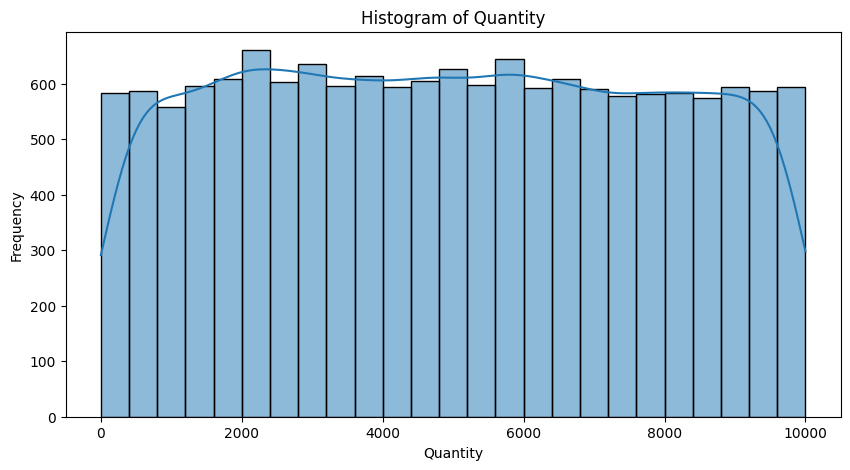

In [51]:
# plot the histogram of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns also label the x and y axis
# Quantity
plt.figure(figsize=(10,5))
sns.histplot(dataset['Quantity'], kde=True)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()


- The distribution of **Quantity** is mostly uniform, with some fluctuations across different quantity ranges.
- The KDE curve shows a slight rise around 1,000 and 7,000 units, indicating a small preference for these quantity levels in the dataset.
- There is a minor dip at the start of the range (close to 0) and at the higher end (close to 10,000).
- The overall shape suggests that transactions involve a wide range of item quantities with no strong concentration in any specific range, but there are slightly more transactions in the middle ranges (1,000 - 7,000 units).


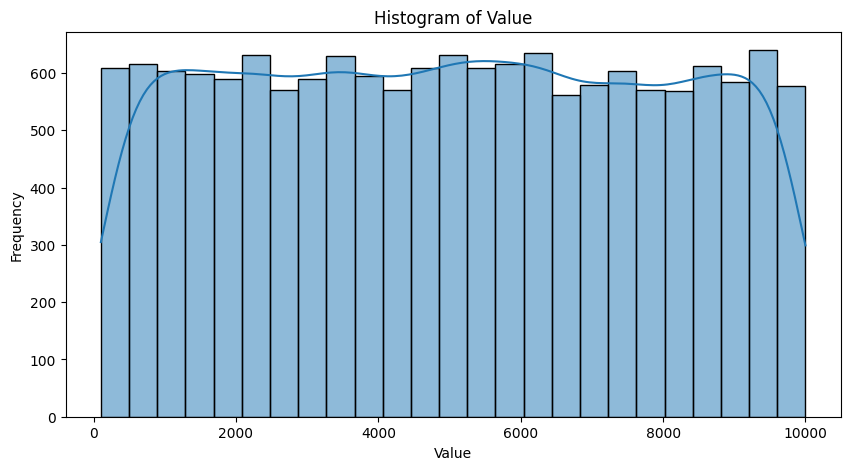

In [50]:
# Value
plt.figure(figsize=(10,5))
sns.histplot(dataset['Value'], kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value')
plt.show()

- The **Value** (in USD) is also relatively uniformly distributed, similar to the quantity.
- The KDE curve shows that there is a higher frequency of transactions with values between 1,000 and 7,000 USD.
- There are slight dips near 0 and 10,000 USD, meaning that fewer transactions involve extreme low or high values.
- The uniformity, with some concentration in the middle, suggests that the dataset has a balanced spread of transaction values, without strong bias toward very expensive or very inexpensive transactions.

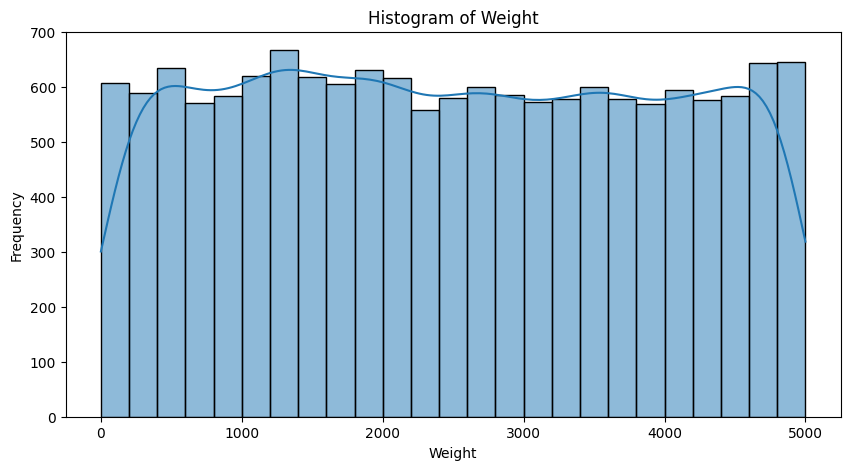

In [49]:
# Weight
plt.figure(figsize=(10,5))
sns.histplot(dataset['Weight'], kde=True)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')
plt.show()


- The **Weight** (in kg) distribution shows similar patterns to the other variables, with a near-uniform spread across the range from 0 to 5,000 kg.
- The KDE curve shows slight peaks around the 1,000 - 2,000 kg and 4,000 - 5,000 kg ranges, meaning that some shipments tend to cluster in these weight ranges.
- Like the other variables, the frequency drops at the extremes (close to 0 kg and near 5,000 kg), with most transactions falling somewhere in the middle.
- This distribution indicates a broad range of shipment sizes, with a slight preference for medium to larger shipments.

**General Insights:**
- All three histograms show relatively uniform distributions with some minor fluctuations, indicating that the dataset has a wide range of values for quantity, value, and weight.
- The slight concentration in the middle ranges (1,000 - 7,000 for Quantity and Value, and 1,000 - 5,000 for Weight) suggests that most transactions are of medium size in terms of quantity, value, and shipment weight, with fewer extreme small or large transactions.
- The KDE curves further reinforce the idea that the distributions are relatively balanced, with no extreme skewness or concentration in any one area.
  
These visualizations suggest that the dataset is well-rounded and diverse in terms of the size, value, and weight of transactions.

### 5.3. **Density Plots**
    The density plots of the numerical columns are plotted to estimate the probability density function of variance in the data.

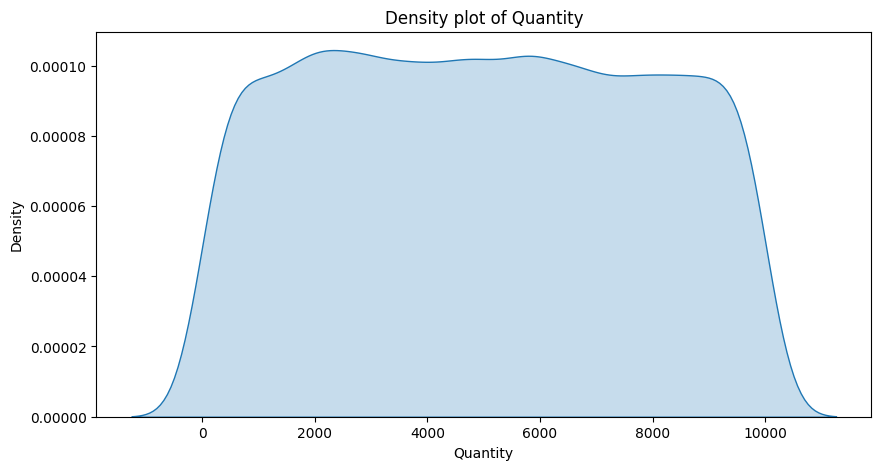

In [58]:
# plot the Density plot of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight'  to estimate the probability 
# density function of the variable
# Quantity
plt.figure(figsize=(10,5))
sns.kdeplot(dataset['Quantity'], fill=True)
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.title('Density plot of Quantity')
plt.show()



- The plot shows a flat density across the range from 0 to 10,000 units. This suggests a uniform distribution, where all quantity levels have almost equal likelihood of occurring.
- There are small fluctuations around 2,000 and 6,000 units, indicating that transactions involving these quantities might occur slightly more frequently, but overall, the density is evenly spread.
- The variance in the quantity data is consistent across the range, with no significant peaks or drops, indicating that different quantities are equally probable.


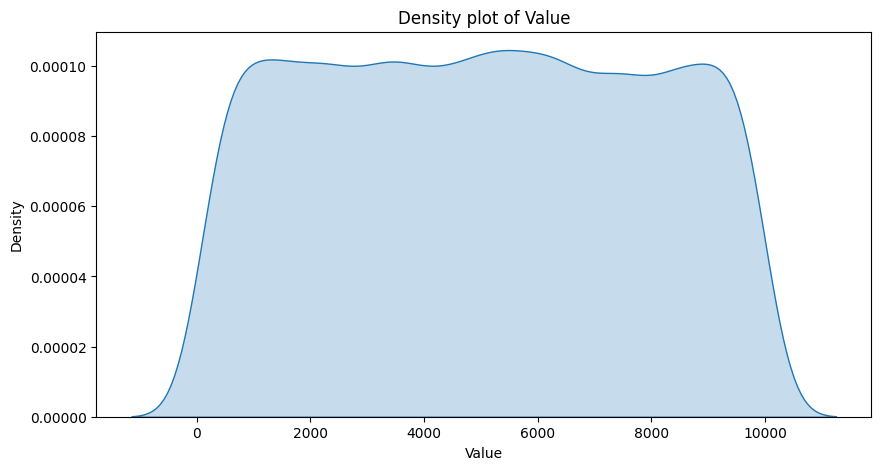

In [57]:
# Value
plt.figure(figsize=(10,5))
sns.kdeplot(dataset['Value'], fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of Value')
plt.show()

- The Value (in USD) also shows a relatively flat density, indicating that transactions across the full range of values (from 0 to 10,000 USD) have almost equal likelihood.
- Small fluctuations around 2,000 and 9,000 USD suggest that there may be slightly more transactions involving values in these ranges, but overall, the distribution remains uniform.
- The density plot shows a uniform spread of transaction values, meaning the dataset contains a wide range of transaction amounts without significant variance in specific value ranges.

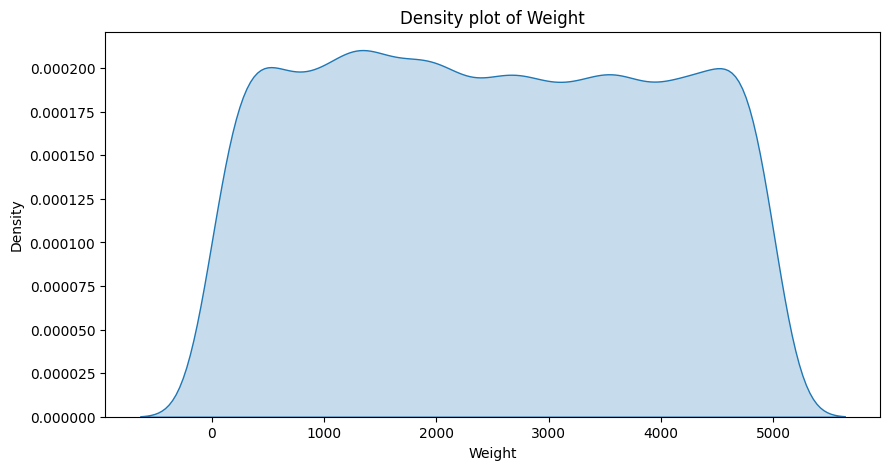

In [56]:

# Weight
plt.figure(figsize=(10,5))
sns.kdeplot(dataset['Weight'], fill=True)
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Density plot of Weight')
plt.show()

- The Weight (in kg) distribution follows a similar pattern, with a flat density across the range from 0 to 5,000 kg.
- Slight fluctuations can be seen around 1,000 and 4,000 kg, suggesting these weight ranges might occur slightly more often, but overall, the distribution remains even.
- The uniform shape of the density plot indicates that the variance in weights is consistent across different shipment sizes, with no strong bias toward small or large weights.
